In [ ]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3137, done.
remote: Counting objects: 100% (3137/3137), done.
remote: Compressing objects: 100% (2652/2652), done.
remote: Total 3137 (delta 809), reused 1343 (delta 441), pack-reused 0
Receiving objects: 100% (3137/3137), 33.35 MiB | 23.98 MiB/s, done.
Resolving deltas: 100% (809/809), done.


In [ ]:
# %%bash
!sudo apt install -y protobuf-compiler
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python setup.py install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/content/models/research
running install
running bdist_egg
running egg_info
creating object_detection.egg-info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib_tf1_te

In [ ]:
import os
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython tf_slim tensorflow_io

os.environ['PYTHONPATH'] = '/content/models/research:/content/models/research/slim:' + os.environ['PYTHONPATH']

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,908 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd

In [ ]:
!pip install tensorflow-object-detection-api

     |████████████████████████████████| 577 kB 7.8 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 3.6 MB 47.0 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=7d6ef8f2379256d6157d375a054fdd1c001b5b23648c1f8d94b1502e5fdd721b
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sacrebleu 2.0.0 requires portalocker, which is not installed.


In [ ]:
!pip uninstall tf_slim
!pip install tf_slim
%cd /content/

Found existing installation: tf-slim 1.1.0
Uninstalling tf-slim-1.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/tf_slim-1.1.0-py3.7.egg
Proceed (y/n)? y
  Successfully uninstalled tf-slim-1.1.0
     |████████████████████████████████| 352 kB 9.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires keras==2.6.0, but you have keras 2.7.0 which is incompatible.
tf-models-official 2.7.0 requires pyyaml>=5.1, but you have pyyaml 3.13 which is incompatible.
/content


In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [ ]:
# patch tf1 into `utils.ops`
import tensorflow as tf
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! pip install kaggle
! mkdir /root/.kaggle
! cp /content/drive/MyDrive/kaggle.json /root/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
%cd /content/
! kaggle datasets download andrewmvd/helmet-detection --force
! unzip /content/helmet-detection.zip

Mounted at /content/drive
/content
 97% 379M/391M [00:04<00:00, 90.1MB/s]
100% 391M/391M [00:04<00:00, 90.6MB/s]
Archive:  /content/helmet-detection.zip
  inflating: annotations/BikesHelmets0.xml  
  inflating: annotations/BikesHelmets1.xml  
  inflating: annotations/BikesHelmets10.xml  
  inflating: annotations/BikesHelmets100.xml  
  inflating: annotations/BikesHelmets101.xml  
  inflating: annotations/BikesHelmets102.xml  
  inflating: annotations/BikesHelmets103.xml  
  inflating: annotations/BikesHelmets104.xml  
  inflating: annotations/BikesHelmets105.xml  
  inflating: annotations/BikesHelmets106.xml  
  inflating: annotations/BikesHelmets107.xml  
  inflating: annotations/BikesHelmets108.xml  
  inflating: annotations/BikesHelmets109.xml  
  inflating: annotations/BikesHelmets11.xml  
  inflating: annotations/BikesHelmets110.xml  
  inflating: annotations/BikesHelmets111.xml  
  inflating: annotations/BikesHelmets112.xml  
  inflating: annotations/BikesHelmets113.xml  
  infla

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
!cp -r pycocotools /content/models/research/
%cd /content/

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 21.48 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-prote

In [ ]:
import glob
import cv2
import os
import pandas as pd
import xml.etree.ElementTree as ET

path = "/content/images/"
label = "helmet"
training = []
IMG_SIZE = 200

# print(os.listdir(path))
for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))      
      training.append(new_array)

# # print(xml_df)
# # cv2_imshow(training[0])

# # img = cv2.imread(os.path.join(path,"BikesHelmets0.png"))
# # cv2_imshow(img)

# # print(img_array.shape)
# # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

In [ ]:
import os

import numpy as np

import shutil

rootdir= '/content/' #path of the original folder

# classes = ['With Helmet', 'Without Helmet']

train_path = '/content/train/'
test_path = '/content/test/'
# for i in classes:

if not(os.path.exists(train_path)):
  os.makedirs(train_path)
if not(os.path.exists(test_path)):
  os.makedirs(test_path)

source = '/content/annotations/'
allFileNames = os.listdir(source)
# print(allFileNames)
np.random.shuffle(allFileNames)
test_ratio = 0.25
train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                    [int(len(allFileNames)* (1 - test_ratio))])

# print(train_FileNames)
for name in train_FileNames:
  iname=os.path.splitext(name)[0]+".png"
  shutil.copy('/content/images/'+iname, rootdir +'train/')
  shutil.copy(source+name, rootdir +'train/')

for name in test_FileNames:
  iname=os.path.splitext(name)[0]+".png"
  shutil.copy('/content/images/'+iname, rootdir +'test/')
  shutil.copy(source+name, rootdir +'test/')

In [ ]:
%cd /content/

/content


In [ ]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            # print('MEMBER', member)
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[5][0].text),
                     int(member[5][1].text),
                     int(member[5][2].text),
                     int(member[5][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df
    
def main():
  rootdir= '/content/'
  for folder in ['train','test']:
    # for folder in ['/content/'+]:
        # image_path = os.path.join(os.getcwd(), ('images/' + folder))
        # xml_df = xml_to_csv(image_path)
        xml_df = xml_to_csv(rootdir+folder)
        # xml_df.to_csv(('labels/' + folder + '_labels.csv'), index=None)
        # lable_dir='/content/labels'
        # if not(os.path.exists(lable_dir)):
        #   os.makedirs(lable_dir)
        xml_df.to_csv((folder+ '_labels.csv'), index=None)
        print('Successfully converted xml to csv.')
        print(xml_df["class"].value_counts())

main()


Successfully converted xml to csv.
With Helmet       724
Without Helmet    375
Name: class, dtype: int64
Successfully converted xml to csv.
With Helmet       238
Without Helmet    114
Name: class, dtype: int64


In [ ]:
%pwd
%cd /content/
# %find . -name="train_labels.csv"

/content


In [ ]:
%%writefile generate_tfrecord.py
"""
Usage:
  # From tensorflow/models/
  # Create train data:
  python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record

  # Create test data:
  python generate_tfrecord.py --csv_input=images/test_labels.csv  --image_dir=images/test --output_path=test.record
"""
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf
import tensorflow.compat.v1 as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

flags = tf.app.flags
flags.DEFINE_string('csv_input', '', 'Path to the CSV input')
flags.DEFINE_string('image_dir', '', 'Path to the image directory')
flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
FLAGS = flags.FLAGS


# TO-DO replace this with label map
def class_text_to_int(row_label):
    if row_label == 'With Helmet': # names should exactly match with the CSV file label names
        return 1
    elif row_label == 'Without Helmet': # names should exactly match with the CSV file label names
        return 2
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'png'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example


def main(_):
    writer = tf.python_io.TFRecordWriter(FLAGS.output_path)
    path = os.path.join(os.getcwd(), FLAGS.image_dir)
    examples = pd.read_csv(FLAGS.csv_input)
    grouped = split(examples, 'filename')
    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()
    output_path = os.path.join(os.getcwd(), FLAGS.output_path)
    print('Successfully created the TFRecords: {}'.format(output_path))


if __name__ == '__main__':
    tf.app.run()


Overwriting generate_tfrecord.py


In [ ]:
!python generate_tfrecord.py --csv_input=train_labels.csv --image_dir=images --output_path=train.record

Successfully created the TFRecords: /content/train.record


In [ ]:
!python generate_tfrecord.py --csv_input=test_labels.csv --image_dir=images --output_path=test.record

Successfully created the TFRecords: /content/test.record


In [ ]:
# !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz

In [ ]:
# !tar -xf /content/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz

In [ ]:
%%writefile model_main.py

r"""Creates and runs TF2 object detection models.
For local training/evaluation run:
PIPELINE_CONFIG_PATH=path/to/pipeline.config
MODEL_DIR=/tmp/model_outputs
NUM_TRAIN_STEPS=10000
SAMPLE_1_OF_N_EVAL_EXAMPLES=1
python model_main_tf2.py -- \
  --model_dir=$MODEL_DIR --num_train_steps=$NUM_TRAIN_STEPS \
  --sample_1_of_n_eval_examples=$SAMPLE_1_OF_N_EVAL_EXAMPLES \
  --pipeline_config_path=$PIPELINE_CONFIG_PATH \
  --alsologtostderr
"""
from absl import flags
import tensorflow.compat.v2 as tf
from object_detection import model_lib_v2

flags.DEFINE_string('pipeline_config_path', None, 'Path to pipeline config '
                    'file.')
flags.DEFINE_integer('num_train_steps', None, 'Number of train steps.')
flags.DEFINE_bool('eval_on_train_data', False, 'Enable evaluating on train '
                  'data (only supported in distributed training).')
flags.DEFINE_integer('sample_1_of_n_eval_examples', None, 'Will sample one of '
                     'every n eval input examples, where n is provided.')
flags.DEFINE_integer('sample_1_of_n_eval_on_train_examples', 5, 'Will sample '
                     'one of every n train input examples for evaluation, '
                     'where n is provided. This is only used if '
                     '`eval_training_data` is True.')
flags.DEFINE_string(
    'model_dir', None, 'Path to output model directory '
                       'where event and checkpoint files will be written.')
flags.DEFINE_string(
    'checkpoint_dir', None, 'Path to directory holding a checkpoint.  If '
    '`checkpoint_dir` is provided, this binary operates in eval-only mode, '
    'writing resulting metrics to `model_dir`.')

flags.DEFINE_integer('eval_timeout', 3600, 'Number of seconds to wait for an'
                     'evaluation checkpoint before exiting.')

flags.DEFINE_bool('use_tpu', False, 'Whether the job is executing on a TPU.')
flags.DEFINE_string(
    'tpu_name',
    default=None,
    help='Name of the Cloud TPU for Cluster Resolvers.')
flags.DEFINE_integer(
    'num_workers', 1, 'When num_workers > 1, training uses '
    'MultiWorkerMirroredStrategy. When num_workers = 1 it uses '
    'MirroredStrategy.')
flags.DEFINE_integer(
    'checkpoint_every_n', 1000, 'Integer defining how often we checkpoint.')
flags.DEFINE_boolean('record_summaries', True,
                     ('Whether or not to record summaries during'
                      ' training.'))

FLAGS = flags.FLAGS


def main(unused_argv):
  flags.mark_flag_as_required('model_dir')
  flags.mark_flag_as_required('pipeline_config_path')
  tf.config.set_soft_device_placement(True)

  if FLAGS.checkpoint_dir:
    model_lib_v2.eval_continuously(
        pipeline_config_path=FLAGS.pipeline_config_path,
        model_dir=FLAGS.model_dir,
        train_steps=FLAGS.num_train_steps,
        sample_1_of_n_eval_examples=FLAGS.sample_1_of_n_eval_examples,
        sample_1_of_n_eval_on_train_examples=(
            FLAGS.sample_1_of_n_eval_on_train_examples),
        checkpoint_dir=FLAGS.checkpoint_dir,
        wait_interval=300, timeout=FLAGS.eval_timeout)
  else:
    if FLAGS.use_tpu:
      # TPU is automatically inferred if tpu_name is None and
      # we are running under cloud ai-platform.
      resolver = tf.distribute.cluster_resolver.TPUClusterResolver(
          FLAGS.tpu_name)
      tf.config.experimental_connect_to_cluster(resolver)
      tf.tpu.experimental.initialize_tpu_system(resolver)
      strategy = tf.distribute.experimental.TPUStrategy(resolver)
    elif FLAGS.num_workers > 1:
      strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy()
    else:
      strategy = tf.compat.v2.distribute.MirroredStrategy()

    with strategy.scope():
      model_lib_v2.train_loop(
          pipeline_config_path=FLAGS.pipeline_config_path,
          model_dir=FLAGS.model_dir,
          train_steps=FLAGS.num_train_steps,
          use_tpu=FLAGS.use_tpu,
          checkpoint_every_n=FLAGS.checkpoint_every_n,
          record_summaries=FLAGS.record_summaries)

if __name__ == '__main__':
  tf.compat.v1.app.run()


Writing model_main.py


In [ ]:
!git clone https://github.com/kbardool/keras-frcnn.git

In [ ]:
%%writefile labelmap.pbtxt
item {
  id: 1
  name: 'Without Helmet'
}

item {
  id: 2
  name: 'With Helmet'
}

Overwriting labelmap.pbtxt


In [ ]:
%%writefile pipeline.config
model {
  ssd {
    num_classes: 2
    image_resizer {
      fixed_shape_resizer {
        height: 640
        width: 640
      }
    }
    feature_extractor {
      type: "ssd_resnet50_v1_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 0.00039999998989515007
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.029999999329447746
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    box_predictor {
      weight_shared_convolutional_box_predictor {
        conv_hyperparams {
          regularizer {
            l2_regularizer {
              weight: 0.00039999998989515007
            }
          }
          initializer {
            random_normal_initializer {
              mean: 0.0
              stddev: 0.009999999776482582
            }
          }
          activation: RELU_6
          batch_norm {
            decay: 0.996999979019165
            scale: true
            epsilon: 0.0010000000474974513
          }
        }
        depth: 256
        num_layers_before_predictor: 4
        kernel_size: 3
        class_prediction_bias_init: -4.599999904632568
      }
    }
    anchor_generator {
      multiscale_anchor_generator {
        min_level: 3
        max_level: 7
        anchor_scale: 4.0
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_ratios: 0.5
        scales_per_octave: 2
      }
    }
    post_processing {
      batch_non_max_suppression {
        score_threshold: 9.99999993922529e-09
        iou_threshold: 0.6000000238418579
        max_detections_per_class: 100
        max_total_detections: 100
        use_static_shapes: false
      }
      score_converter: SIGMOID
    }
    normalize_loss_by_num_matches: true
    loss {
      localization_loss {
        weighted_smooth_l1 {
        }
      }
      classification_loss {
        weighted_sigmoid_focal {
          gamma: 2.0
          alpha: 0.25
        }
      }
      classification_weight: 1.0
      localization_weight: 1.0
    }
    encode_background_as_zeros: true
    normalize_loc_loss_by_codesize: true
    inplace_batchnorm_update: true
    freeze_batchnorm: false
  }
}
train_config {
  batch_size: 8
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
  data_augmentation_options {
    random_crop_image {
      min_object_covered: 0.0
      min_aspect_ratio: 0.75
      max_aspect_ratio: 3.0
      min_area: 0.75
      max_area: 1.0
      overlap_thresh: 0.0
    }
  }
  sync_replicas: true
  optimizer {
    momentum_optimizer {
      learning_rate {
        cosine_decay_learning_rate {
          learning_rate_base: 0.03999999910593033
          total_steps: 25000
          warmup_learning_rate: 0.013333000242710114
          warmup_steps: 2000
        }
      }
      momentum_optimizer_value: 0.8999999761581421
    }
    use_moving_average: false
  }
  fine_tune_checkpoint: "ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0"
  num_steps: 2000
  startup_delay_steps: 0.0
  replicas_to_aggregate: 8
  max_number_of_boxes: 100
  unpad_groundtruth_tensors: false
  fine_tune_checkpoint_type: "detection"
  use_bfloat16: false
  fine_tune_checkpoint_version: V2
}
train_input_reader {
  label_map_path: "../labelmap.pbtxt"
  tf_record_input_reader {
    input_path: "../train.record"
  }
}
eval_config {
  metrics_set: "coco_detection_metrics"
  use_moving_averages: false
}
eval_input_reader {
  label_map_path: "../labelmap.pbtxt"
  shuffle: false
  num_epochs: 4
  tf_record_input_reader {
    input_path: "../test.record"
  }
}


Writing pipeline.config


In [ ]:
%pwd

'/content'

In [ ]:
!cp /content/drive/MyDrive/content.zip /content/
!unzip /content/content.zip

Archive:  /content/content.zip
   creating: content/exported-models/
  inflating: content/exported-models/pipeline.config  
   creating: content/exported-models/checkpoint/
  inflating: content/exported-models/checkpoint/ckpt-0.data-00000-of-00001  
  inflating: content/exported-models/checkpoint/checkpoint  
  inflating: content/exported-models/checkpoint/ckpt-0.index  
   creating: content/exported-models/saved_model/
  inflating: content/exported-models/saved_model/saved_model.pb  
   creating: content/exported-models/saved_model/assets/
   creating: content/exported-models/saved_model/variables/
  inflating: content/exported-models/saved_model/variables/variables.index  
  inflating: content/exported-models/saved_model/variables/variables.data-00000-of-00001  


In [ ]:
# # %mkdir /content/models/my_ssd_resnet50_v1_fpn
# %pwd
# %cd /content/
# !ls 
# # !cp model_main_tf2.py /content/model/research/object_detection/model_main_tf2.py
%cd /content/trainning_demo/models/
%rm -rf my_ssd_resnet50_v1_fpn
%mkdir my_ssd_resnet50_v1_fpn

/content/trainning_demo/models


In [ ]:

%cd /content/trainning_demo/
!python model_main_tf2.py --model_dir=models/my_ssd_resnet50_v1_fpn --pipeline_config_path=models/my_ssd_resnet50_v1_fpn/pipeline.config

/content/trainning_demo
Traceback (most recent call last):
  File "model_main_tf2.py", line 31, in <module>
    from object_detection import model_lib_v2
ImportError: cannot import name 'model_lib_v2' from 'object_detection' (/usr/local/lib/python3.7/dist-packages/object_detection/__init__.py)


In [ ]:
%pwd
%cd /content/trainning_demo/
# %cat model_main_tf2.py

In [ ]:
!python model_main_tf2.py --model_dir=models/my_ssd_resnet50_v1_fpn --pipeline_config_path=models/my_ssd_resnet50_v1_fpn/pipeline.config --checkpoint_dir=models/my_ssd_resnet50_v1_fpn

Traceback (most recent call last):
  File "model_main_tf2.py", line 31, in <module>
    from object_detection import model_lib_v2
ImportError: cannot import name 'model_lib_v2' from 'object_detection' (/usr/local/lib/python3.7/dist-packages/object_detection/__init__.py)


In [ ]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
# List of the strings that are used to add a correct label for each box.
PATH_TO_LABELS = '/content/'

In [ ]:
%tensorflow_version 2.x

In [ ]:
%cd /content/

/content


In [ ]:
import time
# import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = '/content/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model'

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
model = tf.saved_model.load(PATH_TO_SAVED_MODEL)
detect_fn = model.signatures['serving_default']

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# %%
# Load label map data (for plotting)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Label maps correspond index numbers to category names, so that when our convolution network
# predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility
# functions, but anything that returns a dictionary mapping integers to appropriate string labels
# would be fine.

category_index = label_map_util.create_category_index_from_labelmap('labelmap.pbtxt',
                                                                    use_display_name=True)


Loading model...Done! Took 12.149180889129639 seconds


In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/my_ssd_resnet50_v1_fpn/pipeline.config --trained_checkpoint_dir /content/my_ssd_resnet50_v1_fpn --output_directory /content/exported-models/my_model

In [ ]:
# %pwd
!export CUDA_VISIBLE_DEVICES=""
!mkdir /content/eval_dir
!python /content/models/research/object_detection/legacy/eval.py --logtostderr  --pipeline_config_path=pipeline.config   --checkpoint_dir=/content/exported-models/checkpoint/   --eval_dir=eval_dir/

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

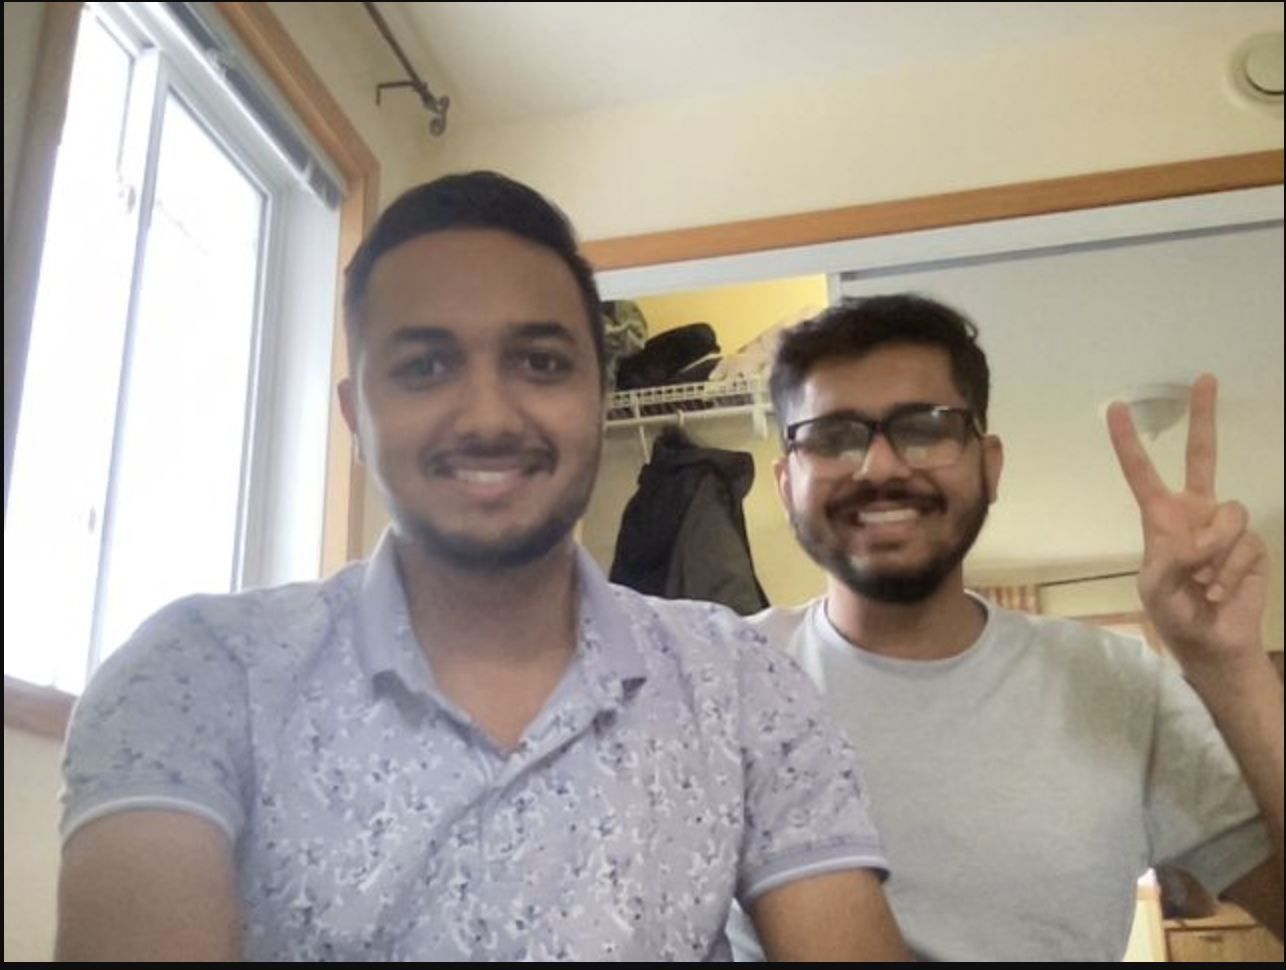

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('photo.jpeg')
cv2_imshow(img)

Done


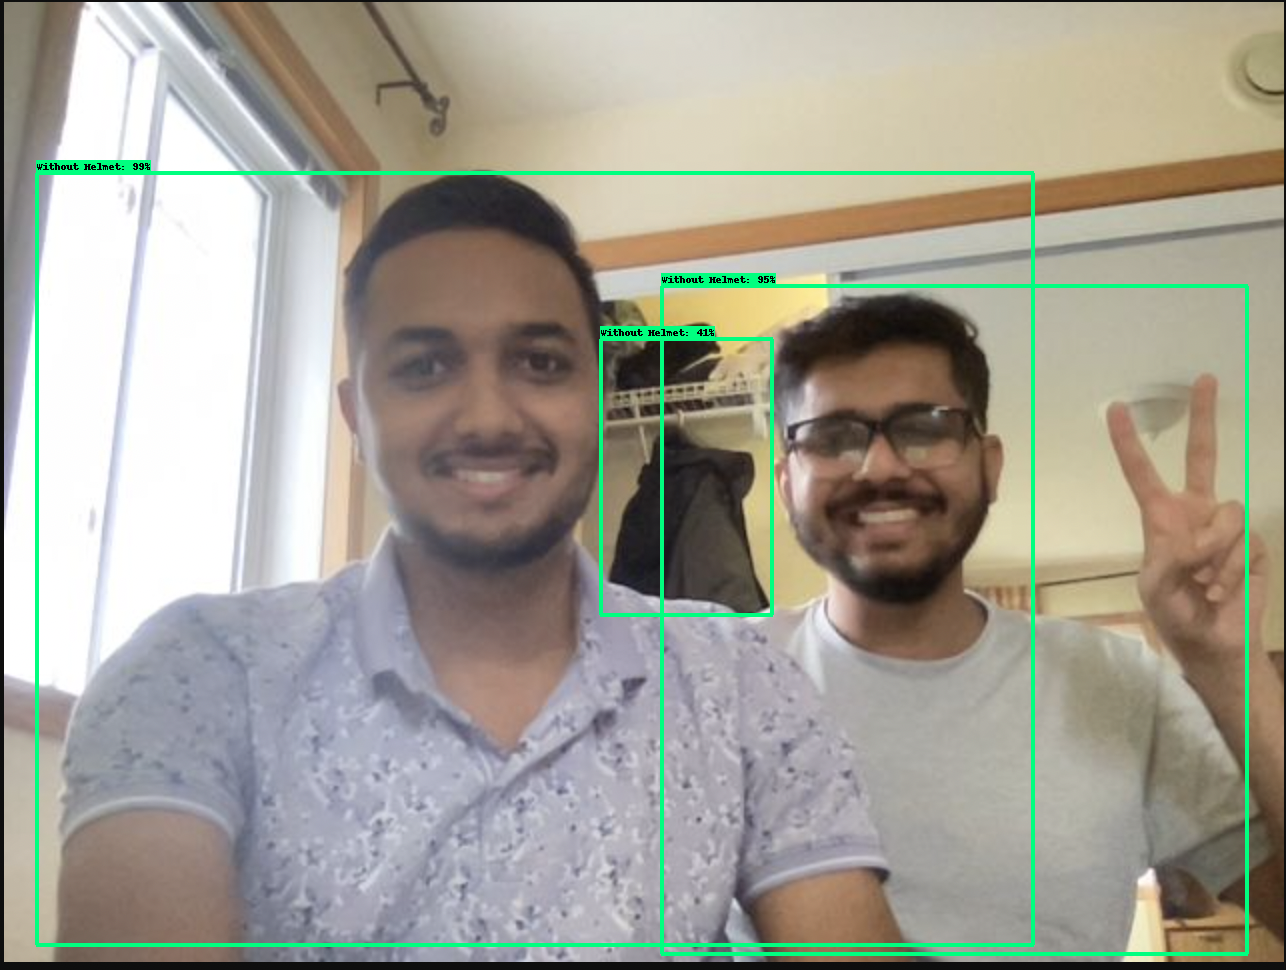

In [ ]:
import numpy as np
from PIL import Image
# import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

# def load_image_into_numpy_array(path):
#     """Load an image from file into a numpy array.

#     Puts image into numpy array to feed into tensorflow graph.
#     Note that by convention we put it into a numpy array with shape
#     (height, width, channels), where channels=3 for RGB.

#     Args:
#       path: the file path to the image

#     Returns:
#       uint8 numpy array with shape (img_height, img_width, 3)
#     """
#     return (Image.open(path))

# for image_path in IMAGE_PATHS:
image_np = img
# print(type(image_path))
# print('Running inference for {}... '.format(image_path), end='')

# image_np = load_image_into_numpy_array(image_path)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=5,
      min_score_thresh=.30,
      agnostic_mode=False)

# plt.figure()
# plt.imshow(image_np_with_detections)
print('Done')
# plt.show()
cv2_imshow(image_np_with_detections)
# sphinx_gallery_thumbnail_number = 2


In [ ]:
%pwd


'/content'

In [ ]:
%cat /content/models/research/object_detection/legacy/train.py